# FAF.FIA16.1 -- Artificial Intelligence Fundamentals

> **Lab 1:** Expert Systems \\
> **Performed by:** Cambur Dumitru, group FAF-191 \\
> **Verified by:** Mihail Gavrilita





## Imports and Utils

In [ ]:
from rules import *
from production import *
from utils import *


## Task 1 -- Define 5 types of tourists that visit Luna-City. Draw the Goal Tree representing these

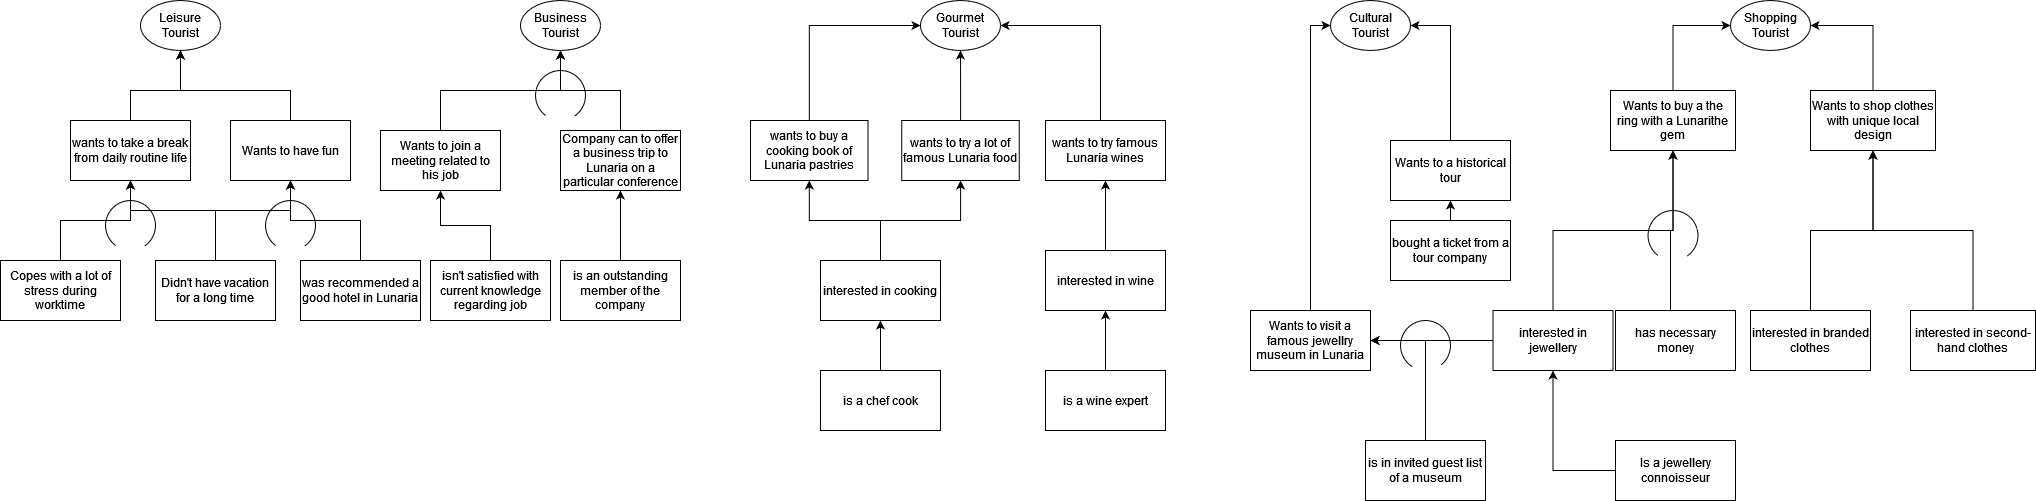

## Task 2 -- Implement the rules from the defined tree in Task 1 in your code (use the IF, AND, OR and THEN rules which are already implemented

In [7]:
TOURIST_RULESET = (

    # first type
    IF(AND(LeisureTokens.stress,
           LeisureTokens.no_vacation),
       THEN(LeisureTokens.wants_a_break)),

    IF(AND(LeisureTokens.hotel_recommended,
           LeisureTokens.no_vacation),
       THEN(LeisureTokens.wants_fun)),

    IF(OR(LeisureTokens.wants_a_break,
          LeisureTokens.wants_fun),
       THEN(LeisureTokens.conclusion)),

    # second type
    IF(AND(BusinessTokens.wants_know_more),
       THEN(BusinessTokens.wants_a_meet)),

    IF(AND(BusinessTokens.is_outstanding),
       THEN(BusinessTokens.company_allows)),

    IF(AND(BusinessTokens.wants_a_meet,
           BusinessTokens.company_allows),
       THEN(BusinessTokens.conclusion)),

    # third type
    IF(AND(GourmetTokens.chef_cook),
       THEN(GourmetTokens.interested_in_cooking)),

    IF(AND(GourmetTokens.wine_expert),
       THEN(GourmetTokens.interested_in_wine)),

    IF(AND(GourmetTokens.interested_in_cooking),
       THEN(GourmetTokens.wants_cooking_book)),

    IF(AND(GourmetTokens.interested_in_cooking),
       THEN(GourmetTokens.wants_taste_food)),

    IF(AND(GourmetTokens.interested_in_wine),
       THEN(GourmetTokens.wants_taste_wine)),

    IF(OR(GourmetTokens.wants_taste_food,
          GourmetTokens.wants_taste_wine,
          GourmetTokens.wants_cooking_book),
       THEN(GourmetTokens.conclusion)),

    # fourth type

    # shared state
    IF(AND(CulturalTokens.is_jewellery_expert),
       THEN(CulturalTokens.interested_in_jewellery)),

    IF(AND(CulturalTokens.interested_in_jewellery,
           CulturalTokens.is_museum_guest),
       THEN(CulturalTokens.wants_visit_jewellery_museum)),

    IF(CulturalTokens.tour_ticket,
       THEN(CulturalTokens.wants_join_tour)),

    IF(OR(CulturalTokens.wants_visit_jewellery_museum,
          CulturalTokens.wants_join_tour),
       THEN(CulturalTokens.conclusion)),

    # fifth type
    IF(OR(ShoppingTokens.interested_in_branded_clothes,
          ShoppingTokens.interested_in_second_hand),
       THEN(ShoppingTokens.wants_shop_clothes)),

    IF(AND(ShoppingTokens.interested_in_jewellery,
           ShoppingTokens.has_necessary_money),
       THEN(ShoppingTokens.wants_buy_lunarithe_ring)),

    IF(OR(ShoppingTokens.wants_buy_lunarithe_ring,
          ShoppingTokens.wants_shop_clothes),
       THEN(ShoppingTokens.conclusion)),
)

## Task 3 -- If you are using the provided code, check how the Forward Chaining algorithm works and illustrate an example. If you are implementing your own code, implement the Forward Chaining algorithm yourself

In [17]:
leisure_tourist_name = "Dmitriy"

TOURIST_DATA = (
    LeisureTokens.no_vacation.replace("(?x)", leisure_tourist_name),

)

print(forward_chain(TOURIST_RULESET, TOURIST_DATA))

("Dmitriy didn't have vacation for a long time", "nxaxaxa didn't have vacation for a long time")


## Task 4 -- Implement the Backward Chaining algorithm for the Goal Tree.

In [10]:
def backward_chain(rules, hypothesis, verbose=False):
    """
    Outputs the goal tree from having rules and hypothesis,
    works like an "encyclopedia"
    """
    for rule in rules:
        match_res = match(rule.consequent()[0], hypothesis)
        if match_res:
            list_rules.append(rule.antecedent())
            for antecedent in rule.antecedent():
                hypothesis = populate(antecedent, match_res)
                backward_chain(rules, hypothesis, verbose)
    return list_rules

leisure_tourist_name = "Dmitriy"
hypothesis = LeisureTokens.conclusion.replace("(?x)", leisure_tourist_name)
backward = backward_chain(TOURIST_RULESET, hypothesis)
print(backward)

[OR('(?x) wants to take a break from daily routine life', '(?x) Wants to have fun'), AND('(?x) copes with a lot of stress during worktime', "(?x) didn't have vacation for a long time"), AND('(?x) was recommended a good hotel in Lunaria', "(?x) didn't have vacation for a long time"), OR('(?x) wants to take a break from daily routine life', '(?x) Wants to have fun'), AND('(?x) copes with a lot of stress during worktime', "(?x) didn't have vacation for a long time"), AND('(?x) was recommended a good hotel in Lunaria', "(?x) didn't have vacation for a long time"), OR('(?x) wants to take a break from daily routine life', '(?x) Wants to have fun'), AND('(?x) copes with a lot of stress during worktime', "(?x) didn't have vacation for a long time"), AND('(?x) was recommended a good hotel in Lunaria', "(?x) didn't have vacation for a long time")]


## Task 5 -- Implement a system for generating questions from the Goal Tree. Have at least 2 or 3 types of questions (e.g yes / no, multiple choice, etc).

In [11]:
class Selector:
    def __init__(self):
        self.var = "(?x)"
        self.leisure_list = LeisureTokens().to_choice_list()
        self.cultural_list = CulturalTokens().to_choice_list()
        self.business_list = BusinessTokens().to_choice_list()
        self.shopping_list = ShoppingTokens().to_choice_list()
        self.gourmet_list = GourmetTokens().to_choice_list()
        self.conclusion_list = [LeisureTokens.conclusion,
                                CulturalTokens.conclusion,
                                BusinessTokens.conclusion,
                                ShoppingTokens.conclusion,
                                GourmetTokens.conclusion]
        self.selector = ""

    def selection_input(self, name):
        choice_list = self._choice_list()
        print(
            f"Pick from the list of facts about {name} (ex:1 2 10 4).\n"
            f"Your choices are:")

        for index, fact in choice_list:
            print(f"\t{index}: {fact}")

        self.selector = input("\nChoose: ")

        to_chain = []
        for index in self.selector.split(" "):
            if int(index) == choice_list[int(index)][0]:
                to_chain.append(
                    choice_list[int(index)][1].replace(self.var, name))
        forward = forward_chain(TOURIST_RULESET, to_chain)

        return self._suggestion(forward, name)

    def _combine_lists(self):
        return list(
            set(self.leisure_list +
                self.cultural_list +
                self.gourmet_list +
                self.shopping_list +
                self.business_list
                )
        )

    def _suggestion(self, chained_data, name):
        suggestion_list = []
        for conclusion in self.conclusion_list:
            named_conclusion = conclusion.replace(self.var, name)
            if named_conclusion in chained_data:
                suggestion_list.append(named_conclusion)

        if len(suggestion_list) == 0:
            return f"{name} doesn't belong to any of the tourist groups. " \
                   f"(write yes/no to proceed)"
        return f"Does tourist belong to the" \
               f" next group of tourist {suggestion_list}? " \
               f"(write yes/no to proceed)"

    def _choice_list(self):
        return list(enumerate(self._combine_lists()))
# Two types of question are asked: multiple choice (selection) and yes/no (suggestion)

## Task 6 -- Wrap up everything in an interactive Expert System that will dynamically ask questions based on the input from the user. Both Forward Chaining and Backward Chaining should be working

In [12]:
if __name__ == '__main__':
    print("Welcome to Expert System! Lets do a quiz to find a tourist type!\n")
    selector = Selector()
    while True:
        name = input("Write new tourist name: ")
        suggestion = selector.selection_input(name)
        print(suggestion)
        suggestion_confirm = input("Write Here: ")
        while True:
            if suggestion_confirm == "yes":
                print("We are glad to help you!")
                break
            elif suggestion_confirm == "no":
                print(
                    "Sorry for inconveniences, "
                    "The Expert System still needs more data and rulesets "
                    "to become more accurate")
                break
            else:
                print(
                    f"System doesn't now what {suggestion_confirm}. "
                    f"Please write 'yes' or 'no'")
                suggestion_confirm = input("Write Here: ")

        exit_command = input(
            "\nDo you want to continue? "
            "(write yes/any other input to proceed)\n"
            "Write Here: ")

        if exit_command != "yes":
            print("Thanks for using expert system!")
            break


Welcome to Expert System! Lets do a quiz to find a tourist type!

Write new tourist name: Dima
Pick from the list of facts about Dima (ex:1 2 10 4).
Your choices are:
	0: (?x) isn't satisfied with current knowledge regarding job
	1: (?x) interested in second-hand clothes
	2: (?x) copes with a lot of stress during worktime
	3: (?x) has necessary money
	4: (?x) is a wine expert
	5: (?x) is in invited guest list of a museum
	6: (?x) is an outstanding member of the company
	7: (?x) is a chef cook
	8: (?x) interested in branded clothes
	9: (?x) bought a ticket from a tour company
	10: (?x) was recommended a good hotel in Lunaria
	11: (?x) didn't have vacation for a long time
	12: (?x) is a jewellery connoisseur

Choose: 1
Does tourist belong to the next group of tourist ['Dima is a shopping tourist']? (write yes/no to proceed)
Write Here: no
Sorry for inconveniences, The Expert System still needs more data and rulesets to become more accurate

Do you want to continue? (write yes/any other i

## Task 7 -- Format the output and questions to human readable format

In [13]:
# Look in task above, questions are human readable, so are answers

## Conclusions:

After implementing this laboratory work I've learnt about AND/OR-trees. forward/backward chaining and about the general consensus on how Rule-Based Expert Systems operate. To conclude, thought my system is simpler than an Expert system, it still operates on rules and forward chaining principles, making the whole work study worthy experience which can be used as a start on more serious projects.

## Bibliography:

https://en.wikipedia.org/wiki/And%E2%80%93or_tree

https://www.tutorialspoint.com/artificial_intelligence/artificial_intelligence_expert_systems.htm
